<a href="https://colab.research.google.com/github/haricash/climate-networks/blob/main/rainfall_data_amit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 8)

In [ ]:
import os
import glob

In [ ]:
import netCDF4 as nc4

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm as mplcm

In [ ]:
# Open multiple files of TRMM dataset, one file per year
mfdataDIR = '1998-2019-10S_to_40N_60E_to_100E/one-file-per-year/3B42_Daily_????_10S-40N--60E-100E.nc4'
ds = xr.open_mfdataset(mfdataDIR)

In [ ]:
ds

<xarray.Dataset>
Dimensions:            (time: 8034, lon: 161, lat: 201)
Coordinates:
  * time               (time) datetime64[ns] 1998-01-01 ... 2019-12-30
  * lon                (lon) float32 60.12 60.38 60.62 ... 99.62 99.88 100.1
  * lat                (lat) float32 -10.12 -9.875 -9.625 ... 39.38 39.62 39.88
Data variables:
    precipitation      (time, lon, lat) float32 dask.array<concatenate, shape...
    precipitation_cnt  (time, lon, lat) int16 dask.array<concatenate, shape=(...
    randomError        (time, lon, lat) float32 dask.array<concatenate, shape...
    randomError_cnt    (time, lon, lat) int16 dask.array<concatenate, shape=(...
Attributes:
    BeginDate:       1998-01-01
    BeginTime:       01:30:00.000Z
    EndDate:         1998-01-02
    EndTime:         01:29:59.999Z
    FileHeader:      StartGranuleDateTime=1998-01-01T01:30:00.000Z;\012StopGr...
    InputPointer:    3B42.19980101.03.7.HDF;3B42.19980101.06.7.HDF;3B42.19980...
    title:           TRMM (TMPA) L3 Daily 0.25 x 0.25 degree (TRMM_3B42_Daily)
    ProductionTime:  2016-07-20T13:48:20.000Z
    NCO:             netCDF Operators version 4.9.3 (Homepage = http://nco.sf...
    history:         Wed Feb 10 11:00:48 2021: ncatted -a long_name,time,o,c,...

In [ ]:
# https://stackoverflow.com/questions/13648774/get-year-month-or-day-from-numpy-datetime64
times = ds.time.values
# years = times.astype('datetime64[Y]').astype(int)
# months = times.astype('datetime64[M]').astype(int) % 12 + 1
# dates = times.astype('datetime64[D]').astype(int) % 12 + 1


In [ ]:
years = times.astype('datetime64[Y]').astype(int) + 1998 - 28
years

array([1998, 1998, 1998, ..., 2019, 2019, 2019])

In [ ]:
months = times.astype('datetime64[M]').astype(int) % 12 + 1
months

array([ 1,  1,  1, ..., 12, 12, 12])

In [ ]:
times.astype('datetime64[D]')

array(['1998-01-01', '1998-01-02', '1998-01-03', ..., '2019-12-28',
       '2019-12-29', '2019-12-30'], dtype='datetime64[D]')

In [ ]:
aa = times.astype('datetime64[D]')
nds = years.shape[0]
days = np.zeros(nds)
for ii in np.arange(nds):
    days[ii] = aa[ii].astype(object).day
days = days.astype(int)
days

array([ 1,  2,  3, ..., 28, 29, 30])

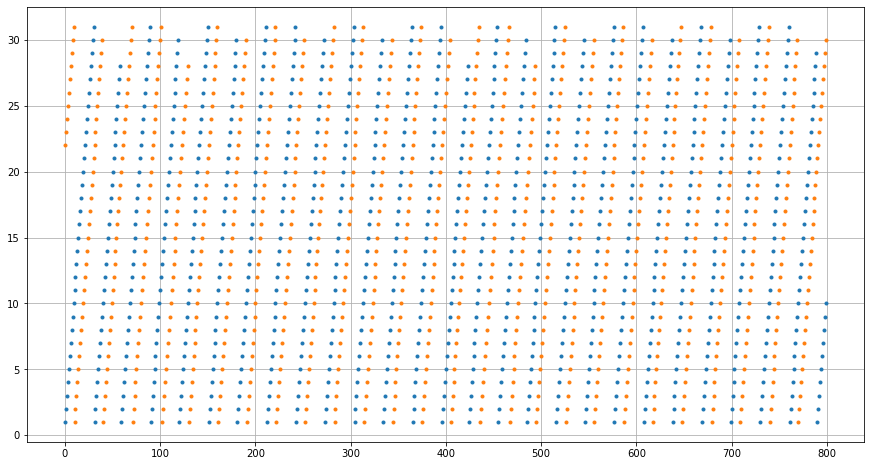

In [ ]:
plt.plot(np.arange(800), days[:800],'.')
plt.plot(np.arange(800), days[-800:],'.')
plt.grid()

Ref: 
* last line of https://stackoverflow.com/a/26895491/5139902 -- did not work...
* but hint from https://stackoverflow.com/a/35281829/5139902 worked
* and finally the function from here https://stackoverflow.com/a/56260054/5139902 is the BEST answer....

In [ ]:
################## not necessary .....
### the above works well

def dt2cal(dt):
    """
    Convert array of datetime64 to a calendar array of year, month, day, hour,
    minute, seconds, microsecond with these quantites indexed on the last axis.
    Parameters
    ----------
    dt : datetime64 array (...)
        numpy.ndarray of datetimes of arbitrary shape
    Returns
    -------
    cal : uint32 array (..., 7)
        calendar array with last axis representing year, month, day, hour,
        minute, second, microsecond
    """
    # allocate output 
    out = np.empty(dt.shape + (7,), dtype="u4")
    # decompose calendar floors
    Y, M, D, h, m, s = [dt.astype(f"M8[{x}]") for x in "YMDhms"]
    out[..., 0] = Y + 1970 # Gregorian Year
    out[..., 1] = (M - Y) + 1 # month
    out[..., 2] = (D - M) + 1 # dat
    out[..., 3] = (dt - D).astype("m8[h]") # hour
    out[..., 4] = (dt - h).astype("m8[m]") # minute
    out[..., 5] = (dt - m).astype("m8[s]") # second
    out[..., 6] = (dt - s).astype("m8[us]") # microsecond
    return out


timescal = dt2cal(times)
## but I just need year, month, day (not hour etc.)
timescal = timescal[:,0:3]

NameError: name 'dt2cal' is not defined

In [ ]:
## print(timescal[:,0], timescal[:,1], timescal[:,2])

[1998 1998 1998 ... 2019 2019 2019] [ 1  1  1 ... 12 12 12] [ 1  2  3 ... 28 29 30]


In [ ]:
lat = ds.lat.values
lon = ds.lon.values

In [ ]:
print(lat.shape, lon.shape)
print('latitudes: \n', lat)
print('longitudes: \n', lon)

(201,) (161,)
latitudes: 
 [-10.125  -9.875  -9.625  -9.375  -9.125  -8.875  -8.625  -8.375  -8.125
  -7.875  -7.625  -7.375  -7.125  -6.875  -6.625  -6.375  -6.125  -5.875
  -5.625  -5.375  -5.125  -4.875  -4.625  -4.375  -4.125  -3.875  -3.625
  -3.375  -3.125  -2.875  -2.625  -2.375  -2.125  -1.875  -1.625  -1.375
  -1.125  -0.875  -0.625  -0.375  -0.125   0.125   0.375   0.625   0.875
   1.125   1.375   1.625   1.875   2.125   2.375   2.625   2.875   3.125
   3.375   3.625   3.875   4.125   4.375   4.625   4.875   5.125   5.375
   5.625   5.875   6.125   6.375   6.625   6.875   7.125   7.375   7.625
   7.875   8.125   8.375   8.625   8.875   9.125   9.375   9.625   9.875
  10.125  10.375  10.625  10.875  11.125  11.375  11.625  11.875  12.125
  12.375  12.625  12.875  13.125  13.375  13.625  13.875  14.125  14.375
  14.625  14.875  15.125  15.375  15.625  15.875  16.125  16.375  16.625
  16.875  17.125  17.375  17.625  17.875  18.125  18.375  18.625  18.875
  19.125  19.375  19.625

In [ ]:
latgr, longr = np.meshgrid(lat, lon)

In [ ]:
prcpgr = ds.precipitation.values

In [ ]:
print(latgr.shape, longr.shape, prcpgr.shape)
print('lat - ', lat.shape, 'lon - ', lon.shape)

(161, 201) (161, 201) (8034, 161, 201)
lat -  (201,) lon -  (161,)


In [ ]:
prcp = prcpgr.reshape(8034, 161*201)
# "ds.precipitation.values"  is just a regular numpy array
# with shape: (8034, 161, 201), so reshape it
prcp.shape

(8034, 32361)

In [ ]:
print(np.any(np.isnan(prcp) | np.isinf(prcp)))
print(np.sum(np.isnan(prcp) | np.isinf(prcp)))
print(np.sum(np.isnan(prcp)), ' NaN out of total elements = ', prcp.shape, ' = ', prcp.size)
print(np.sum(np.isinf(prcp)), ' Inf out of total elements = ', prcp.shape, ' = ', prcp.size)

True
9718
9718  NaN out of total elements =  (8034, 32361)  =  259988274
0  Inf out of total elements =  (8034, 32361)  =  259988274


In [ ]:
prcp = np.nan_to_num(prcp)

In [ ]:
print(np.any(np.isnan(prcp) | np.isinf(prcp)))
print(np.sum(np.isnan(prcp) | np.isinf(prcp)))
print(np.sum(np.isnan(prcp)), ' NaN out of total elements = ', prcp.shape, ' = ', prcp.size)
print(np.sum(np.isinf(prcp)), ' Inf out of total elements = ', prcp.shape, ' = ', prcp.size)

False
0
0  NaN out of total elements =  (8034, 32361)  =  259988274
0  Inf out of total elements =  (8034, 32361)  =  259988274


/tmp/ipykernel_315132/3999096299.py:20: RuntimeWarning: invalid value encountered in arctanh
  cb.set_ticklabels(np.arctanh(cbtk)*scl)


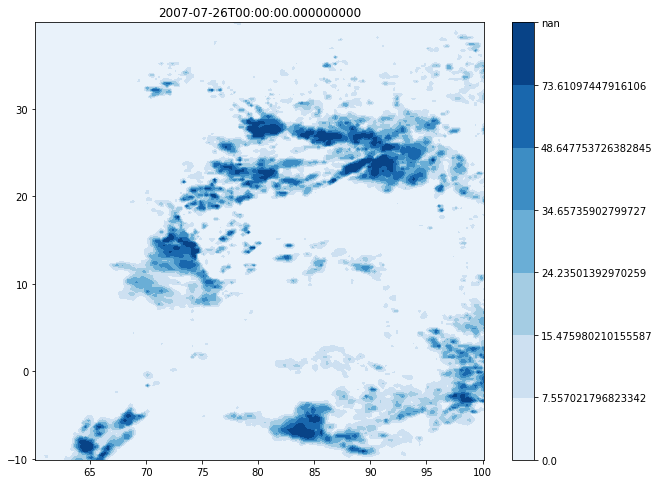

In [ ]:
dt = 3493
fig = plt.figure(figsize=(201/20,161/20))
ax = fig.add_subplot(111)
scl=50
plt.contourf(longr.T, latgr.T, np.tanh(prcpgr[dt,:,:].T/scl), cmap=mplcm.Blues)
plt.title(times[dt])

#im = ax.get_subplotspec()
#extent =  im[0].get_extent()
#ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)
#ax.set_aspect('equal')

# plt.colorbar()
# v1 = np.linspace(prcpgr[dt,:,:].min(), prcpgr[dt,:,:].max(), 8, endpoint=True)
# cb = plt.colorbar(ticks=v1)
#cb.ax.set_yticklabels(["{:4.2f}".format(i) for i in v1], fontsize='7')

cb = plt.colorbar()
cbtk = cb.get_ticks()
cb.set_ticklabels(np.arctanh(cbtk)*scl)

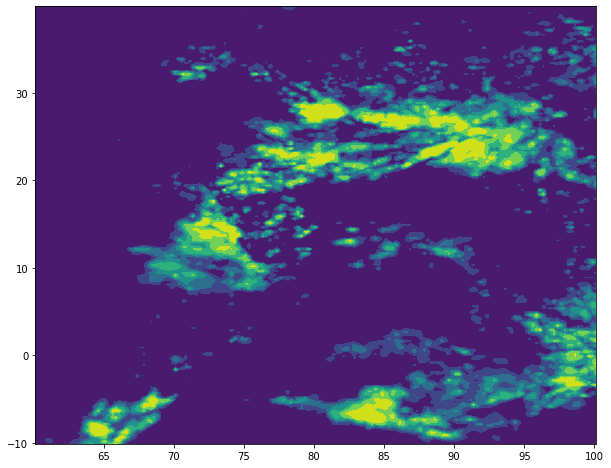

In [ ]:
dt = 3493
fig = plt.figure(figsize=(201/20,161/20))
#ax = fig.add_subplot(111)
plt.contourf(longr.T, latgr.T, np.tanh(prcpgr[dt,:,:].T/40))
#plt.title(times[dt])
#ax.set_aspect('equal')
# plt.colorbar()

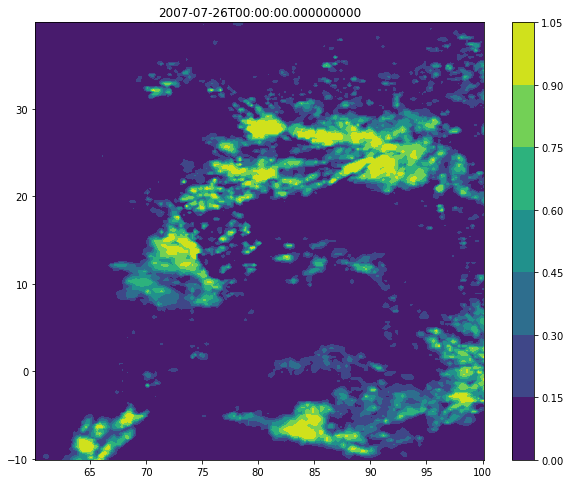

In [ ]:
dt = 3493
fig = plt.figure(figsize=(201/20,161/20))
ax = fig.add_subplot(111)
plt.contourf(longr.T, latgr.T, np.tanh(prcpgr[dt,:,:].T/40))
plt.title(times[dt])
#ax.set_aspect('equal')
plt.colorbar()

In [ ]:
# prcp5yr = prcp[:1826,:]
# print(prcp5yr.shape, prcp5yr.dtype)
# prcp5yr = np.nan_to_num(prcp5yr)

/home/apte/.local/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/apte/.local/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/apte/.local/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/apte/.local/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarnin

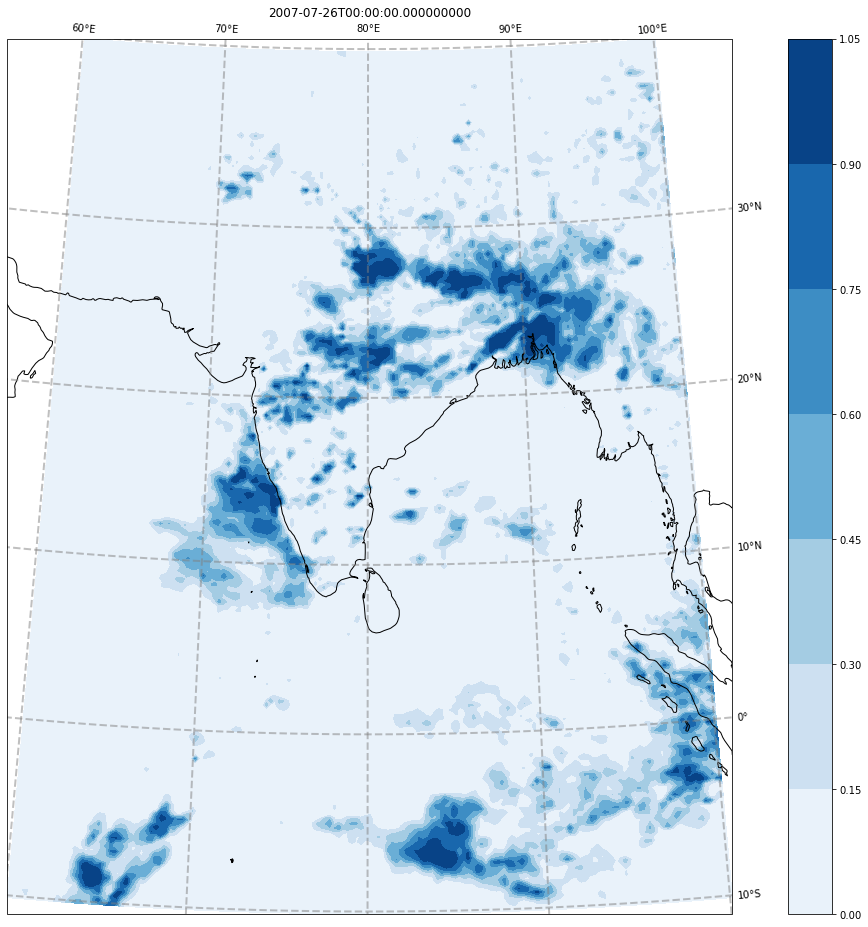

In [ ]:

clon, clat = lon.mean(), lat.mean()  # central lon-lat, 80, 20 for india
elon, wlon = lon.max(), lon.min()  # east-west extent, 60, 96 for india
slat, nlat = lat.min(), lat.max()   # south-north extent, 7, 37 for india 
glon, glat = 4, 6    # number of gridlines (glon - EW, glat - NS), 4, 6 for india

# clon, clat = 10, 10  # central lon-lat, 80, 20 for india for LambertConformal
# elon, wlon = -180, 180  # east-west extent, 60, 96 for india
# slat, nlat = -90, 90   # south-north extent, 7, 37 for india 
# glon, glat = 15, 10    # number of gridlines (glon - EW, glat - NS), 4, 6 for india

# Set the projection information
# Init signature: ccrs.PlateCarree(central_longitude=0.0, globe=None)
# proj = ccrs.PlateCarree(central_longitude=clon)
# proj = ccrs.PlateCarree(central_longitude=80)
proj = ccrs.LambertConformal(central_longitude=clon, central_latitude=clat, standard_parallels=[clat])

# Create a figure with an axes object on which we will plot. Pass the projection to that axes.
#fig, ax = plt.subplots(subplot_kw=dict(projection=proj, position=[0.05, 0.05, 0.9, 0.9]), figsize=(20,10))
#fig, ax = plt.subplots(subplot_kw=dict(projection=proj, position=[0.05, 0.05, 0.9, 0.9]), figsize=(10,20))
fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(201/10, 161/10))
                       
# Zoom in
#ax.set_extent([elon, wlon, slat, nlat])

ax.coastlines('50m')

# Now plot the data
scl=50
dt = 3493
# ax.contourf(longr.T, latgr.T, np.tanh(prcpgr[dt,:,:].T/scl), cmap=mplcm.Blues, transform=proj)
p1 = ax.contourf(longr.T, latgr.T, np.tanh(prcpgr[dt,:,:].T/scl), cmap=mplcm.Blues, transform=ccrs.PlateCarree())
ax.set_title(times[dt])

#ax.contourf(lon1g, lat1g, data1, transform=proj, cmap=mplcm.PuBu_r)
plt.colorbar(p1)
# pl = ds.precipitation(time=0).plot(
#     cmap=plt.cm.Blues,
#     subplot_kws=dict(projection=ccrs.PlateCarree(central_longitude=82.5)),
#     transform=ccrs.PlateCarree())

gr = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--',
                 x_inline=False, y_inline=False)
gr.bottom_labels = False
gr.left_labels = False
# gr.top_labels = False
# gr.right_labels = False

# for ii in (12581, 16214, 16235, 16214+201*10-15): #final one = 18209!!!
#     ax.plot(lonar[ii], latar[ii], marker='$%05d$' % ii, transform=ccrs.PlateCarree(), ms=50)
#     print('%d' % ii)

############# save the figure.....
# plt.savefig('tmp.png')

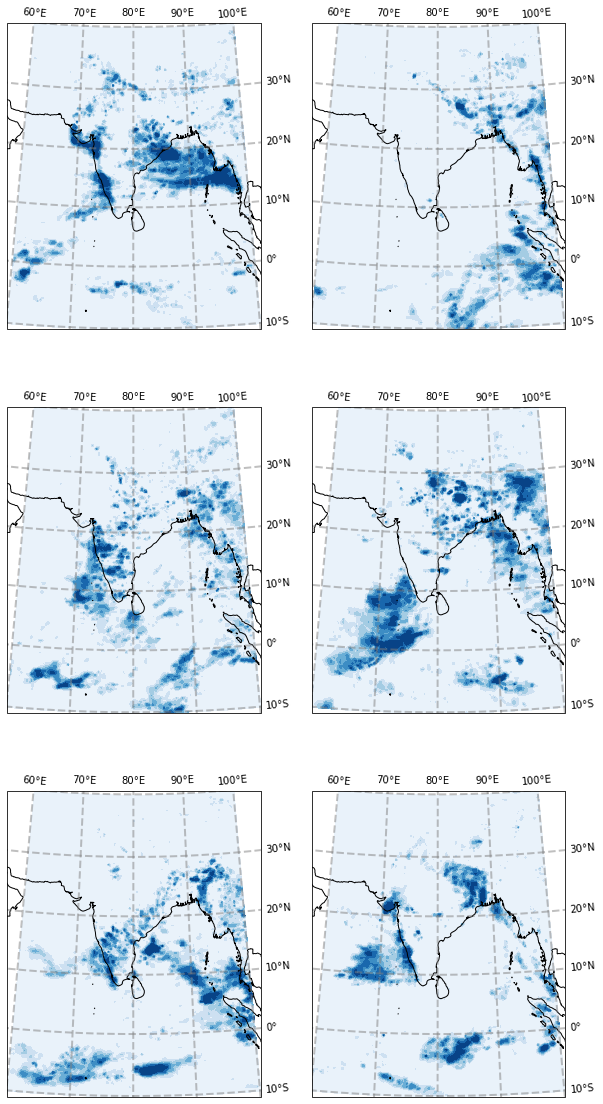

In [ ]:

clon, clat = lon.mean(), lat.mean()  # central lon-lat, 80, 20 for india
elon, wlon = lon.max(), lon.min()  # east-west extent, 60, 96 for india
slat, nlat = lat.min(), lat.max()   # south-north extent, 7, 37 for india 
glon, glat = 4, 6    # number of gridlines (glon - EW, glat - NS), 4, 6 for india

# clon, clat = 10, 10  # central lon-lat, 80, 20 for india for LambertConformal
# elon, wlon = -180, 180  # east-west extent, 60, 96 for india
# slat, nlat = -90, 90   # south-north extent, 7, 37 for india 
# glon, glat = 15, 10    # number of gridlines (glon - EW, glat - NS), 4, 6 for india

# Set the projection information
# Init signature: ccrs.PlateCarree(central_longitude=0.0, globe=None)
# proj = ccrs.PlateCarree(central_longitude=clon)
# proj = ccrs.PlateCarree(central_longitude=80)
proj = ccrs.LambertConformal(central_longitude=clon, central_latitude=clat, standard_parallels=[clat])

# Create a figure with an axes object on which we will plot. Pass the projection to that axes.
#fig, ax = plt.subplots(subplot_kw=dict(projection=proj, position=[0.05, 0.05, 0.9, 0.9]), figsize=(20,10))
#fig, ax = plt.subplots(subplot_kw=dict(projection=proj, position=[0.05, 0.05, 0.9, 0.9]), figsize=(10,20))
fig, axs = plt.subplots(ncols=2, nrows=3, subplot_kw=dict(projection=proj), figsize=(10, 20))

ii=0
for ax in axs.flatten():
    ii = ii+1
    ax.coastlines('50m')
    scl=50
    dt = 3493+10*ii
    # ax.contourf(longr.T, latgr.T, np.tanh(prcpgr[dt,:,:].T/scl), cmap=mplcm.Blues, transform=proj)
    p1 = ax.contourf(longr.T, latgr.T, np.tanh(prcpgr[dt,:,:].T/scl), cmap=mplcm.Blues, transform=ccrs.PlateCarree())
    # ax.set_title(times[dt])
    gr = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                           linewidth=2, color='gray', alpha=0.5, linestyle='--',
                           x_inline=False, y_inline=False)
    gr.bottom_labels = False
    gr.left_labels = False

############# save the figure.....
# plt.savefig('tmp1.png')